<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/BayDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BAYESIAN DATA ANALYSIS**

**Description**

Bayesian data analysis is an increasingly popular method of statistical inference, used to determine conditional probability without having to rely on fixed constants such as confidence levels or p-values. In this course, you’ll learn how Bayesian data analysis works, how it differs from the classical approach, and why it’s an indispensable part of your data science toolbox. You’ll get to grips with A/B testing, decision analysis, and linear regression modeling using a Bayesian approach as you analyze real-world advertising, sales, and bike rental data. Finally, you’ll get hands-on with the PyMC3 library, which will make it easier for you to design, fit, and interpret Bayesian models.



# **1. The Bayesian Way**

Take your first steps in the Bayesian world. In this chapter, you’ll be introduced to the basic concepts of probability and statistical distributions, as well as to the famous Bayes' Theorem, the cornerstone of Bayesian methods. Finally, you’ll build your first Bayesian model to draw conclusions from randomized coin tosses.

**Bayesians vs. Frequentists (Classical)**


The Bayesian approach is a different way to look at statistical inference than what is typically taught in STATS101 classes. The latter is known as frequentist or classical statistics and is quite different from the Bayesian approach.

Let's see if you recognize the differences between these two worlds!

**Probability distributions**

Well done on the previous exercise! Now you have the general idea of what the Bayesian approach is all about. Among other things, you know that for a Bayesian, parameters of statistical models are random variables which can be described by probability distributions.

This exercise will test your ability to visualize and interpret probability distributions. You have been given a long list of draws from a distribution of the heights of plants in centimeters, contained in the variable draws. seaborn and matplotlib.pyplot have been imported for you as sns and plt, respectively. Time to get your hands dirty with data!

[ 3.43469952  2.49531077  7.56144319  7.95200742  5.92408488  5.21632802
  6.89481229  5.66262374  8.82091031  5.38925379  7.08976438  7.74861545
  3.89873203  4.41589233  5.71921093  6.18468833  7.26275525  6.12697002
  5.11991513  8.7624513   2.75257535  7.61614072  6.6653606   4.28855782
  5.16647442  8.63073935  4.01048409  5.22434394  7.26222203  8.73606537
  5.18617299  7.28219208  6.92786477  7.41775255  6.32345801  8.38496081
  8.20250908  4.34820515  5.6109857   7.76633933  5.04090914  6.86145522
  8.40452189  5.9075358   3.72927525  5.55719607  5.22401627  3.53264267
  6.94351925  5.10555023  6.15646214  7.21628054  3.73065684  5.46315362
  7.70873695  3.40644616  6.88436215  8.58921135  8.69970459  6.96721054
  6.96750242  6.8790789   5.67547007  5.7312864   6.09348462  5.81888431
  6.4088242   5.74132136  6.92278406  6.78090151  6.60879853  6.19777053
  4.68995506  6.77712763  5.22019727  6.19858547  4.93531021  9.09603465
  5.70884657  6.7182224   6.17823503  7.86654412  5

<ipython-input-6-4391ee4a22ce>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(draws, shade=True)


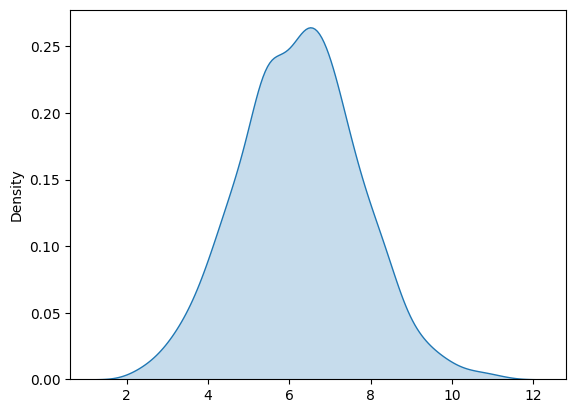

In [ ]:
# import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# make draws with
draws = np.random.normal(6.26, 1.5, 1000)


# Print the list of draws
print(draws)

# Print the length of draws
print(len(draws))

# Plot the density of draws
sns.kdeplot(draws, shade=True)
plt.show()

BAYES THEOREM
$$P(A/B) = \frac{P(B/A) P(A)}{P(B)} $$

**Let's play cards**
You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability you've learned about in the last video, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.

In [ ]:
# Calculate probability of drawing a king or queen
p_king_or_queen = 4 / 52 + 4 / 52
print(p_king_or_queen)
# The probability of drawing a king or a queen is the sum of the two respective probabilities.

# Calculate probability of drawing <= 5
p_five_or_less = 4 / 52 + 4 / 52 + 4 / 52 + 4 / 52
print(p_five_or_less)
# There are four suits, and aces do not count (thus, you are looking for the total number of 2s, 3s, 4s, and 5s).

# Calculate probability of drawing four aces
p_all_four_aces = 4 / 52 * 3 / 51 * 2 / 50 * 1 / 49
print(p_all_four_aces)
# The probability of drawing four aces in a row is the product of the four respective probabilities (remember that once you have \
# drawn the first card, there are 51 left, so the probability of drawing any one particular card in the second draw is 1/51, and so on).


print("Probably well done! The chance of drawing four aces straight is 0.00037%, \
so don't hope for it too much! Now that you're an expert in manipulating probabilities, \
let's take a look at Bayes' Theorem and how to use it to detect spam messages.")

0.15384615384615385
0.3076923076923077
3.693785206390249e-06
Probably well done! The chance of drawing four aces straight is 0.00037%, so don't hope for it too much! Now that you're an expert in manipulating probabilities, let's take a look at Bayes' Theorem and how to use it to detect spam messages.


**Bayesian spam filter**

Well done on the previous exercise! Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: spam detection.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! Hence you've prepared a DataFrame called emails with two variables: spam, whether the email was spam, and contains_3_exlc, whether it contains the string "!!!". The head of the data looks like this:

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create DataFrame
df = pd.DataFrame({
    'spam': np.random.choice([True, False], size=250),
    'contains_3_excl': np.random.choice([True, False], size=250)
})

# Display first few rows
print(df.head())

# Display summary statistics
print("\nValue counts:")
print("\nSpam:")
print(df['spam'].value_counts())
print("\nContains 3 exclamation marks:")
print(df['contains_3_excl'].value_counts())

    spam  contains_3_excl
0   True            False
1  False             True
2   True            False
3   True             True
4   True             True

Value counts:

Spam:
spam
True     126
False    124
Name: count, dtype: int64

Contains 3 exclamation marks:
contains_3_excl
False    132
True     118
Name: count, dtype: int64


In [ ]:
# Calculate and print the unconditional probability of spam
emails = df
p_spam = emails["spam"].mean()
print(p_spam)

# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails["contains_3_excl"].mean()
print(p_3_excl)

# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails.loc[emails["spam"]]["contains_3_excl"].mean()
print(p_3_excl_given_spam)

# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = p_3_excl_given_spam * p_spam / p_3_excl
print(p_spam_given_3_excl)

"Good job! If an email contains the '!!!', you can be 50% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!"

0.504
0.472
0.47619047619047616
0.5084745762711864


"Good job! If an email contains the '!!!', you can be 85% sure it is spam! Next, let's use Bayes' Theorem in practice once again, but this time without the data neatly gathered in a DataFrame!"

**What does the test say?**

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people (s) suffer from it.

The test result came back positive (p). What is the probability that the patient is indeed sick? You can use Bayes' Theorem to answer this question. Here is what you should calculate:


$$P(s/p) = \frac{P(p/s) * p(s)}{P(p)}$$

In [ ]:
# Solving
p_s = 1/1000
p_p = 0.02
p_p_given_s = 0.99
p_s_given_p = p_p_given_s * p_s / p_p
print(p_s_given_p)

# Correct! Not very intuitive, is it? Even though the test is great at discovering
#the disease and raises false alarms rather seldom, a positive result means only a
#5% probability that the patient is sick! Let's move forward to the final lesson of Chapter 1, where you will see a Bayesian statistical model in action!

0.049499999999999995


**Tossing a coin**

In the video, you have seen our custom get_heads_prob() function that estimates the probability of success of a binomial distribution. In this exercise, you will use it yourself and verify whether it does its job well in a coin-flipping experiment.

Watch out for the confusion: there are two different probability distributions involved! One is the binomial, which we use to model the coin-flipping. It's a discrete distribution with two possible values (heads or tails) parametrized with the probability of success (tossing heads). The Bayesian estimate of this parameter is another, continuous probability distribution. We don't know what kind of distribution it is, but we can estimate it with get_heads_prob() and visualize it.

numpy and seaborn have been imported for you as np and sns, respectively.

In [ ]:
def get_heads_prob(tosses, window_size: int = 100) -> np.ndarray:
    """
    Calculate rolling probability of heads over a series of coin tosses.

    Args:
        tosses (array-like): Array of coin tosses (0 for tails, 1 for heads)
        window_size (int): Size of rolling window for probability calculation

    Returns:
        np.ndarray: Array of rolling probabilities
    """
    # Convert to numpy array if not already
    tosses = np.array(tosses)

    # Calculate cumulative sum and indices
    cumsum = np.cumsum(tosses)
    indices = np.arange(1, len(tosses) + 1)

    # Calculate rolling probabilities
    probabilities = cumsum / indices

    # Remove first window_size-1 elements to avoid unstable estimates
    return probabilities[window_size-1:]

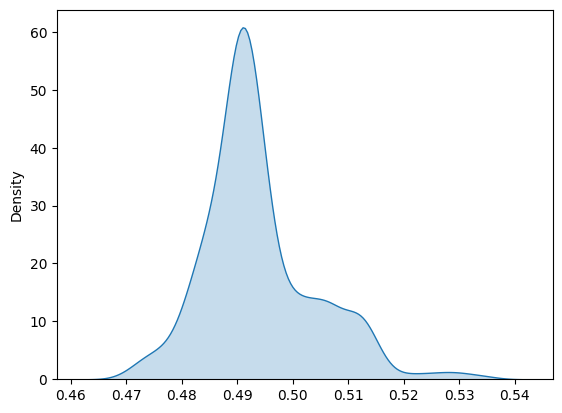

In [ ]:

# Generate 1000 tosses
tosses = np.random.binomial(1, 0.5, size=1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
#sns.kdeplot(heads_prob, shade=True, label="heads probabilty")
sns.kdeplot(heads_prob, fill=True, label="heads probabilty")
plt.show()


#Well done! The density plot peaks around 50%, indicating that the model has estimated
#the heads probability well. Now that you're familiar with get_heads_prob(), let's explore it in more detail in the next exercise!

**The more you toss, the more you learn**

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say? Let's find out! numpy and seaborn have been imported for you as np and sns, respectively.

<ipython-input-24-8b26962c4abb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_nodata, shade=True, label="no data")


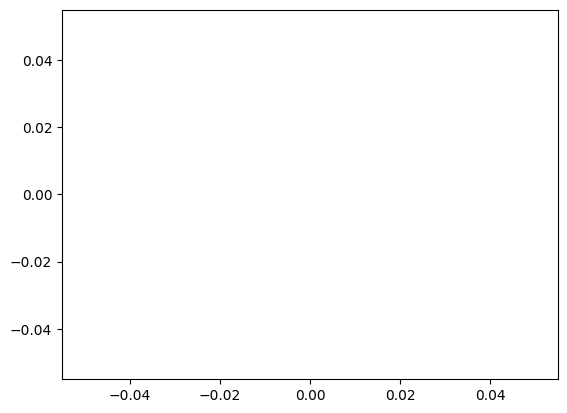

In [ ]:
#Estimate the heads probability using get_heads_prob() based on an empty list, assign the result to heads_prob_nodata and visualize it on a density plot.

# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob([])
sns.kdeplot(heads_prob_nodata, shade=True, label="no data")
plt.show()

<ipython-input-26-bec44c9334dd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")


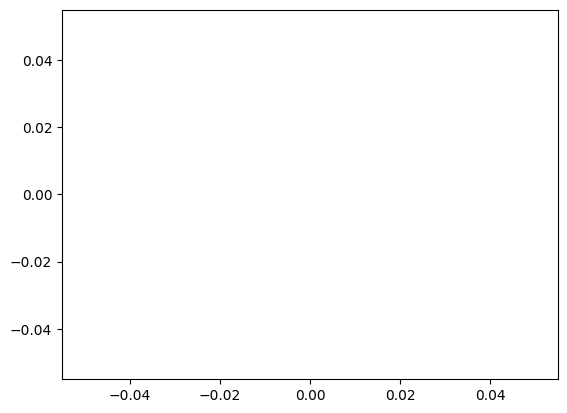

In [ ]:
# Do the same, this time based on a single tails (a list with a single 0) and assigning the result to heads_prob_onetails.

# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob([0])
sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")
plt.show()

<ipython-input-27-4b3ecd907f46>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")


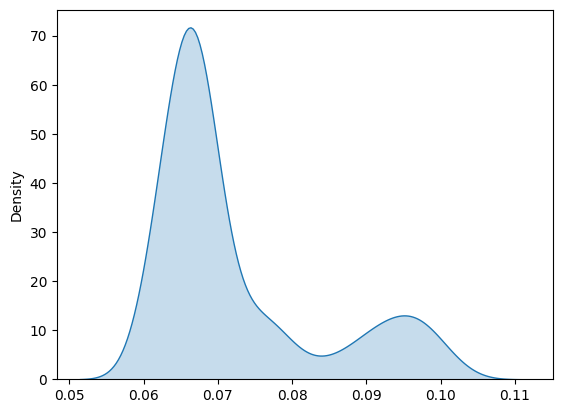

In [ ]:
# Generate a list of 1000 tosses with a biased coin which comes up heads only 5% of all times and assign the result to biased_tosses.
# Estimate the heads probability based on biased_tosses, assign the result to heads_prob_biased and visualize it on a density plot.

# Estimate and plot heads probability based on 1000 tosses with a biased coin
biased_tosses = np.random.binomial(1, 0.05, size=1000)
heads_prob_biased = get_heads_prob(biased_tosses)
sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")
plt.show()


That's interesting! With no data, each possible value of the heads probabilty is equally likely! That's the Bayesian way of saying 'we don't know'. Having seen a single tails, the model suspects that tails is more likely than heads, but since there is so little data, it is not very sure about it, so other values are possible, too. Having seen 1000 tosses, 5% of them heads, the model is certain: the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: as more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate!

**Hey, is this coin fair?**

In the last two exercises, you have examined the get_heads_prob() function to discover how the model estimates the probability of tossing heads and how it updates its estimate as more data comes in.

Now, let's get down to some serious stuff: would you like to play coin flipping against your friend? She is willing to play, as long as you use her special lucky coin. The tosses variable contains a list of 1000 results of tossing her coin. Will you play?

In this exercise, you will be doing some plotting with the seaborn package again, which has been imported for you as sns.

<ipython-input-30-30987f94379d>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heads_prob_first_100, fill=True, label="first_100")


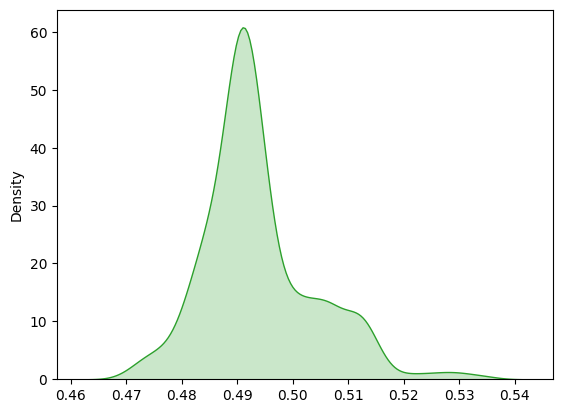

In [ ]:
from textwrap import fill
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses[:10]
tosses_first_100 = tosses[:100]

# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses)

# Plot density of head probability for each subset of tosses
#sns.kdeplot(heads_prob_first_10, shade=True, label="first_10")
#sns.kdeplot(heads_prob_first_100, shade=True, label="first_100")
#sns.kdeplot(heads_prob_all, shade=True, label="all")

sns.kdeplot(heads_prob_first_10, fill=True, label="first_10")
sns.kdeplot(heads_prob_first_100, fill=True, label="first_100")
sns.kdeplot(heads_prob_all, fill=True, label="all")
plt.show()